In [1]:
Pkg.add("StaticArrays");
Pkg.add("PyPlot");


INFO: Package StaticArrays is already installed
INFO: METADATA is out-of-date — you may not have the latest version of StaticArrays
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
Pkg.build("PyCall")

INFO: Building Conda
INFO: Building PyCall
INFO: PyCall is using C:\Users\CedricAlexander.HP-1\.julia\v0.6\Conda\deps\usr\python.exe (Python 2.7.13) at C:\Users\CedricAlexander.HP-1\.julia\v0.6\Conda\deps\usr\python.exe, libpython = C:\Users\CedricAlexander.HP-1\.julia\v0.6\Conda\deps\usr\python27
INFO: C:\Users\CedricAlexander.HP-1\.julia\v0.6\PyCall\deps\deps.jl has not changed
INFO: C:\Users\CedricAlexander.HP-1\.julia\v0.6\PyCall\deps\PYTHON has not changed


In [3]:
using PyPlot

In [4]:
using StaticArrays

# Motivación

### Sistemas dinámicos

Cualquier fenómeno que evoluciona en el tiempo puede ser considerado como un sistema dinámico. Éste sistema se llamará _determinístico_ si se pueden conocer con precisión las reglas de evolución para el futuro, es decir, que dadas las condiciones iniciales del sistema, se puede conocer el estado en cualquier momento del futuro.

Así, un _billar plano_ es el sistema dinámico que, dentro de un conjunto compacto y conexo $Q$, describe el movimiento de una partícula puntual. Dentro de $Q$ el movimiento es uniforme (es decir, tiene velocidad constante) y la reflexión en la frontera es elástica.

Se pueden estudiar muchos billares con formas distintas y cada uno es una clara muestra del caos determinista.
El proyecto siguiente se concentra en el billar de Estadio, por lo que se omitirán de esta introducción.


### Billar de estadio

Partiendo del billar elíptico, se sabe que el espacio de fase no tiene singularidades visibles, pues no tiene vértices y no existen trayectorias tangentes dentro del billar, ya que las trayectorias se restringen a los puntos $ \theta=\pm \left(\frac{pi}{2}\right)$ del espacio de fase.

Ahora, modificando el borde, cortando la elipse por el eje menor, separando las mitades y uniendo las puntas libres con segmentos de recta de una distancia conocida, se obtiene el billar con forma de estadio, _estadio elíptico_. 

Si ahora las curvas de los extremos son semicírculos de radio $ r$, el estadio se llama de _Bunimovich_.

Una vez más, no existen las trayectorias tangentes dentro del espacio de fase de dicho billar, pero ahora si hay cuatro vértices en los puntos donde se unen las rectas con los semicírculos. En estos puntos, la frontera tiene derivada continua, pero su curvatura (que va directamente relacionada con la segunda derivada) es discontinua. 

Resulta que en esos vértices existen singularidades para el espacio de fase, y el estudio de su distribución es fundamental para entender el comportamiento estadístico de los billares dinámicos.

El caso del estadio elíptico presenta trayectorias mucho más complejas que el billar con forma de elipse. El comportamiento general de las partículas depende principalmente de los valores que tome el radio de la semicircunferencia y las longitudes de los segmentos de recta. 

En este proyecto se busca conocer un poco mejor, el comportamiento de las partículas para valores del radio y longitudes dadas.

Como propuesta extra se plantea el _Billar de Sinaí_, el cual plantea el mismo billar que de _Bunimovich_, pero considerando ahora una circunferencia de radio $s<r$ en el origen como obstáculo extra.

In [27]:
function billar(x0,y0,vx,vy,it,err)
    
 posBarrx1=1     ## Se define la posición de las barreras
 t=linspace(0,190,10000);     ## Se define lista de 10000 "tiempos" CHECAR
 x1 = linspace(-1.0, 1, 100)     ## Se define un linspace para poder graficar los medios círculos
 
 yar = 5+sqrt.(abs.(1-x1.*x1))     ## Se definen las ecuaciones de los medios circulos
 yab = -5-sqrt.(abs.(1-x1.*x1))
 
 x12 = linspace(-0.5, 0.5, 100)     ## Se define un linspace para poder graficar el círculo central en un futuro
 yar2 = sqrt.(abs.(1-x1.*x1))     ## Se definen las ecuaciones del círculo central
 yab2 = -sqrt.(abs.(1-x1.*x1))
#xin=x0
#yin=y0
    
    
for j in 1:it 
       posx = zeros(10000);     ## Se define una lista de 1000 entradas para guardar la posicion en x & y.
       posy = zeros(10000);
    choquex = zeros(it);     ## Lista para guardar donde choca en x & y
    choquey = zeros(it);
    
    ## Primero guardemos la trayectoria de las particula en las siguientes listas:    

    for i in 1:10000
        posx[i] = x0+vx*t[i]
        posy[i] = y0+vy*t[i]
    end
            ## Se revisa la posición de choque como sigue:
            for i in 1:10000     ## Se hacen correr todos los puntos (x,y) de la trayectoria y se observa cuando 
                                 ## cumplen la ecuación de la circunferencia " y = sqrt(1-x^2) "
           
            ## En el siguiente if vamos a hacer lo sugiuiente:  (QUISIERA QUITAR ESTO)
            ## Nota: || significa Ó y && significa Y
            ## En el siguiente "if", dada la condición de que, si la posicion de la particula cumple la ecuación
            ## del medio cículo de arriba Ó el medio círculo de abajo y que, si además, k<2
            ## (aqui el k lo ocupamos para que si más de una posicion cumple con el if, sólo nos devuelva un punto)
            ## en conclusión if la posición de la particula cumple con la ec. de la circunferencia y además k<2,haz: (QUITAR)
            ## entonces:
    
                    if abs(posy[i]-5-sqrt(1-(posx[i])*(posx[i])))<err  && abs(posx[i])<1.1                         
                        ##    println("Medio círculo superior")
                         x0 = posx[i-1];
                         y0 = posy[i-1];
                         ## k = 3;  #para que ya no repita!!!
                          m = -x0/sqrt(abs(1.01-x0^2));     ## La pendiente del plano
                        phi = atand(m);     ## El ángulo del plano con la horizontal
                         cx = cosd(phi);     ## Se calculan la componentes de la normal
                         cy = sind(phi);
                          n = SVector(-cy, cx);    ## Realmente no importa a cual coordenada multipliquemos por "-1" ya que
                        #     println(m, "   m    ",phi, "  phi   ",cx, " j    ", cy, "       ", n)                             
                                                                # multiplicamos por sí misma (la n) (NO ENTIENDO MUY BIEN..)
                          V = SVector(vx, vy);     ## Se define el vector director con las velocidades iniciales
                          r = V-(2V.*n).*n;     ## Hacemos lo de math.stackexchange...  (NO SÉ SI ALEX LO PUSO)
                         vx = r[1];     ## Se renombran "vx" y "vy" como la primera y segunda entrada del vector resultante
                         vy = r[2];
                   print(j, "  ")


    
                              break
            
                        ## Ahora para el medio círculo inferior:
                        elseif abs(posy[i]+5+sqrt(1-(posx[i])*(posx[i])))<err  &&abs(posx[i])<1.1                 
                     #       println("Medio círculo inferior")
                         x0 = posx[i-1];
                         y0 = posy[i-1];
                         # k = 3;  #para que ya no repita!!!
                          m = x0/sqrt(abs(1.01-x0^2));     ## La pendiente del plano
                        phi = atand(m);     ## El ángulo del plano con la horizontaL
                         cx = cosd(phi);     ## Se calculan la componentes de la normal
                         cy = sind(phi);
                          n = SVector(-cy, cx);## Realmente no importa a cual coordenada multipliquemos por "-1" ya que
                        #     println(m, "   M    ",phi, "  PHI   ",cx, " X0    ", cy, "   Y0    ", n)                            
                                                                # multiplicamos por sí misma (la n) (SIGO SIN ENTENDER)
                          V = SVector(vx, vy);     ##Se define el vector director con las velocidades iniciales
                          r = V-(2V.*n).*n;     #hacemos lo de math.stackexchange... (REVISAR)
                         vx = r[1];     ## Se renombran "vx" y "vy" como la primera y segunda entrada del vector resultante
                         vy = r[2];
                                
                             print(j, "  ")


                              break
                            
                ## Consideremos ahora lo que sucede si choca con las paredes
                ## Para esto usaremos ""elseif""
                            
                        ##  La condición de la posicion
                            elseif abs(posx[i]+posBarrx1)<err  && posx[i]<0 &&abs(posy[i])<6
                            #     println("pared izq")
                                   # x0 = 0.95;
                                    x0=posx[i-1]
                                    y0 = posy[i];
                                    vx = -vx;     ## Ya que es lo única componente que cambia 
                                        print(j, "  ")
                                     break
                               
                            elseif abs(posx[i]-posBarrx1)<err && posx[i]>0 && abs(posy[i])<6
                            #  println("pared der")
                                 #   x0 = -0.95;
                                    x0=posx[i-1]
                                    y0 = posy[i];
                                    vx = -vx;     ## Ya que es la única componente que cambia
                                        print(j, "  ")
                                     break   
                    end     
            end
     choquey[j]=y0  
    choquex[j]=x0
        x01=x0
    
# println(choquex[j], "       ",choquey[j], "                                     cx, cy")
# println(vx, "                          ",vy, "                     vxfin vyfin")    
 plot(x1, yab,color="green")
 plot(x1, yar,color="green")
 plot(x12, yab2,color="red")
 plot(x12, yar2,color="red")
 plot([-1,-1],[-5,5],linestyle="-",linewidth=1,color="green")
 plot([1,1],[-5,5],linestyle="-",linewidth=1,color="green")
 xlim(-6, 6)
 ylim(-7, 7)
plot(choquex[j],choquey[j])
plot(choquex[j],choquey[j],"o")
show()
end
end


billar (generic function with 1 method)

1  2  3  4  5  6  7  8  9  

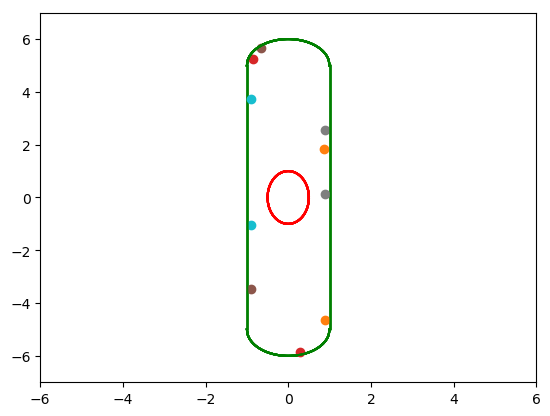

10  

In [28]:
 billar(0,0,3,6,10,0.1)